<a href="https://colab.research.google.com/github/chells990/Google-and-Intel-Stocks-Prediction-Using-LSTM/blob/main/Google_and_Intel_Stocks_Prediction_Using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_GOOGL = pd.read_csv('GOOGL.csv')
df_INTC = pd.read_csv('INTC.csv')

#EDA (1a)

In [ ]:
#FILTERING HANYA MENGGUNAKAN kolom Date dan Close saja
df_GOOGL = df_GOOGL[['Date', 'Close']]
df_INTC = df_INTC[['Date', 'Close']]
print(df_GOOGL.head)
print(df_INTC.head)

<bound method NDFrame.head of             Date        Close
0     2004-08-19    50.220219
1     2004-08-20    54.209209
2     2004-08-23    54.754753
3     2004-08-24    52.487488
4     2004-08-25    53.053055
...          ...          ...
3927  2020-03-26  1162.920044
3928  2020-03-27  1110.260010
3929  2020-03-30  1146.310059
3930  2020-03-31  1161.949951
3931  2020-04-01  1102.099976

[3932 rows x 2 columns]>
<bound method NDFrame.head of              Date      Close
0      1980-03-17   0.325521
1      1980-03-18   0.322917
2      1980-03-19   0.330729
3      1980-03-20   0.329427
4      1980-03-21   0.317708
...           ...        ...
10093  2020-03-26  55.540001
10094  2020-03-27  52.369999
10095  2020-03-30  55.490002
10096  2020-03-31  54.119999
10097  2020-04-01  51.880001

[10098 rows x 2 columns]>


Pada kode di atas, saya melakukan filtering pada dataframe df_GOOGL dan df_INTC dengan hanya menyertakan kolom "Date" dan "Close" saja setelah itu dilakukan preview 5 data teratas dengan menggunakan head function.

In [ ]:
# Check the shape of the dataframe
print(f"shape data frame stocks google {df_GOOGL.shape}")
print(f"shape data frame stocks intel  {df_INTC.shape}")

shape data frame stocks google (3932, 2)
shape data frame stocks intel  (10098, 2)


Pada kode di atas, saya ingin melihat bentuk/shape/dimensi dari dataframe yang ada sehingga kita dapat mengetahui berapa banyak baris dan kolom yang ada dalam dataframe.

In [ ]:
# Check the innformation/charactristics of the dataframe such as dtype dan missing value
df_GOOGL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3932 non-null   object 
 1   Close   3932 non-null   float64
dtypes: float64(1), object(1)
memory usage: 61.6+ KB


In [ ]:
df_INTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10098 non-null  object 
 1   Close   10098 non-null  float64
dtypes: float64(1), object(1)
memory usage: 157.9+ KB


Pada kode di atas, saya ingin melihat informasi tentang dataframe hal ini mencakup jumlah non-null values dalam setiap kolom, tipe data kolom, dan jumlah memori yang digunakan oleh dataframe.

In [ ]:
print("Summary for google: ")
print(df_GOOGL.describe())
print()
print("Summary for intel: ")
print(df_INTC.describe())

Summary for google: 
             Close
count  3932.000000
mean    509.072183
std     357.153459
min      50.055054
25%     238.697449
50%     327.722733
75%     758.502487
max    1524.869995

Summary for intel: 
              Close
count  10098.000000
mean      17.771604
std       16.108504
min        0.216146
25%        1.132812
50%       19.255000
75%       27.307499
max       74.875000


Pada kode di atas, saya ingin melihat summary statistik dari dataframe yang meliputi count (jumlah data), mean, standar deviasi, nilai minimum, kuartil (25%, 50%, 75%), dan nilai maksimum dari setiap kolom numerik dalam dataframe.

In [ ]:
print(df_GOOGL.isnull().sum()[0])
print(df_INTC.isnull().sum()[0])

0
0


Mengecek jumlah nilai yang hilang atau null pada dataframe. Kemudian, metode sum() menjumlahkan semua nilai True (dihitung sebagai 1) untuk setiap kolom, sehingga memberikan jumlah total nilai yang hilang untuk setiap kolom pada dataframe.

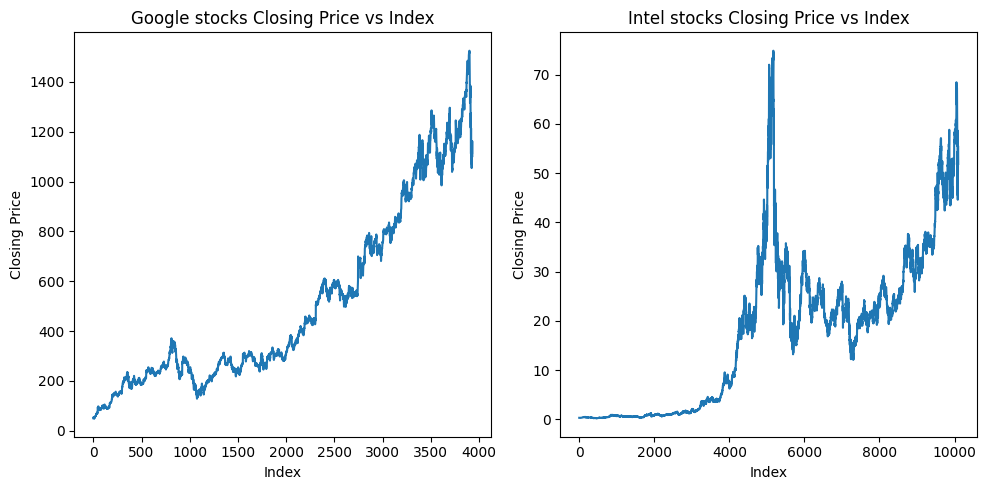

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the close price vs index on the first subplot
ax1.plot(df_GOOGL['Close'])
ax1.set_title("Google stocks Closing Price vs Index")
ax1.set_ylabel('Closing Price')
ax1.set_xlabel('Index')

# Plot the close price vs date on the second subplot
ax2.plot(df_INTC['Close'])
ax2.set_title("Intel stocks Closing Price vs Index")
ax2.set_ylabel('Closing Price')
ax2.set_xlabel('Index')

# Adjust the spacing between the subplots
plt.tight_layout()
plt.show()

Kode di atas membuat dan menampilkan plot dengan menggunakan subplot. Subplot pertama menampilkan grafik harga penutupan (Close) dari dataframe df_GOOGL terhadap indeksnya. Subplot kedua menampilkan grafik harga penutupan (Close) dari dataframe df_INTC terhadap indeksnya.

In [ ]:
#problem kolom date type bukan datetime sehingga diganti

df_GOOGL['Date'] = pd.to_datetime(df_GOOGL['Date'])
df_INTC['Date'] = pd.to_datetime(df_INTC['Date'])

Kode di atas mengubah kolom Date pada dataframe. Ini dilakukan karena dalam masalah timeseries, data harus diurutkan berdasarkan waktu dan tipe data datetime sehingga mempermudah operasi-operasi seperti pengurutan, penyaringan, dan resampling.

In [ ]:
df_GOOGL.index = df_GOOGL.pop('Date')
df_INTC.index = df_INTC.pop('Date')

Kode di atas mengatur kolom Date sebagai indeks pada dataframe, dengan mengubah kolom Date menjadi indeks pada dataframe memungkinkan kita untuk memanfaatkan fungsi-fungsi yang disediakan oleh Pandas untuk menganalisis data timeseries dengan lebih mudah

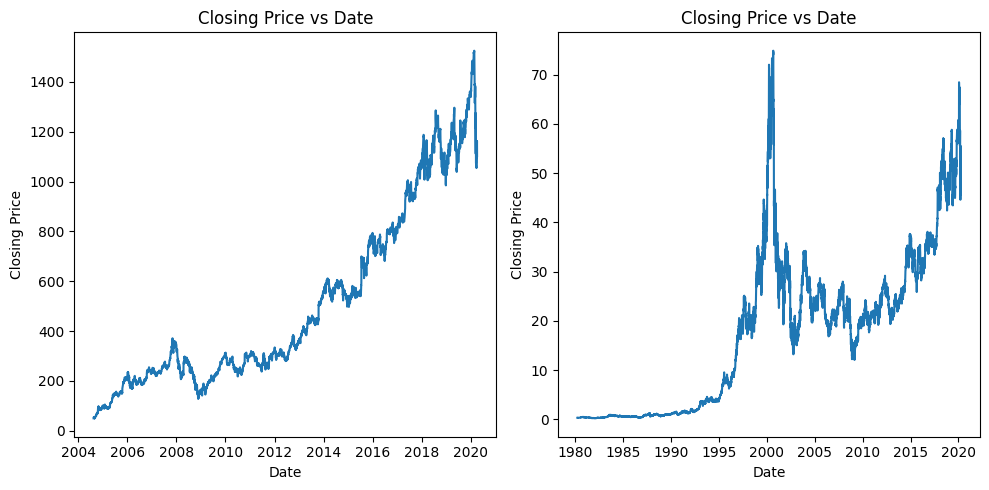

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the close price vs index on the first subplot
ax1.plot(df_GOOGL['Close'])
ax1.set_title("Closing Price vs Date")
ax1.set_ylabel('Closing Price')
ax1.set_xlabel('Date')

# Plot the close price vs date on the second subplot
ax2.plot(df_INTC['Close'])
ax2.set_title("Closing Price vs Date")
ax2.set_ylabel('Closing Price')
ax2.set_xlabel('Date')

# Adjust the spacing between the subplots
plt.tight_layout()
plt.show()

Kode di atas membuat dan menampilkan plot dengan menggunakan subplot. Subplot pertama menampilkan grafik harga penutupan (Close) dari dataframe df_GOOGL terhadap indeksnya yang baru yaitu date. Subplot kedua menampilkan grafik harga penutupan (Close) dari dataframe df_INTC terhadap date.

#Preprocessing

Scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # create a scaler object
price = df_GOOGL['Close'].values.reshape(-1, 1) # get the column values and reshape them to a 2D array
scaled_price = scaler.fit_transform(price) # fit and transform the data
df_GOOGL['scaled_price'] = scaled_price # add the scaled data to the dataframe


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # create a scaler object
price = df_INTC['Close'].values.reshape(-1, 1) # get the column values and reshape them to a 2D array
scaled_price = scaler.fit_transform(price) # fit and transform the data
df_INTC['scaled_price'] = scaled_price # add the scaled data to the dataframe


Dngan melakukan scaling pada data dapat membantu model dalam hal kecepatan dan pembelajaran. Scaling mengubah rentang nilai data sehingga semua fitur memiliki rentang yang sama atau distribusi yang sama. Hal ini dapat meningkatkan kecepatan konvergensi algoritma pembelajaran mesin dan meningkatkan akurasi model dengan memastikan bahwa semua fitur memiliki bobot yang sama dalam proses pembelajaran.

In [ ]:
df_model_googl = df_GOOGL.drop(["Close"], axis=1)
df_model_googl.head(6)

,scaled_price
Date,
2004-08-19,0.000112
2004-08-20,0.002817
2004-08-23,0.003187
2004-08-24,0.001649
2004-08-25,0.002033
2004-08-26,0.002681


In [ ]:
df_model_intc = df_INTC.drop(["Close"], axis=1)
df_model_intc[0:6]

,scaled_price
Date,
1980-03-17,0.001465
1980-03-18,0.001430
1980-03-19,0.001535
1980-03-20,0.001517
1980-03-21,0.001360
1980-03-24,0.001273


Kode diatas melakukan preview terhadap 6 data teratas pada dataframe

# Time series data (1a)

In [ ]:
import numpy as np
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=5):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['scaled_price'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Input(Target-{n-i})'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df


Fungsi df_to_windowed_df di atas mengubah dataframe menjadi dataframe yang baru dengan (window size) 5 dan (horizon) 1. Fungsi ini mengambil data dari tanggal pertama hingga tanggal terakhir yang ditentukan, dan untuk setiap tanggal target, mengambil n+1 baris terakhir dari subset dataframe yang diurutkan berdasarkan waktu hingga tanggal target. Nilai scaled_price dari n baris pertama digunakan sebagai input, dan nilai scaled_price dari baris terakhir digunakan sebagai target. Fungsi ini mengembalikan dataframe baru dengan kolom Target Date, input, dan target.

In [ ]:
windowed_df_intc = df_to_windowed_df(df_model_intc,
                                '1980-03-24',
                                '2020-04-01	', n=5)


windowed_df_googl = df_to_windowed_df(df_model_googl,
                                '2004-08-26',
                                '2020-04-01	', n=5)

Model akan melihat 5 data terakhir yang dimulai dari starting point sampai end point yang sudah ditentukan untuk memprediksi nilai berikutnya.

In [ ]:
windowed_df_googl.head(10)

,Target Date,Input(Target-5),Input(Target-4),Input(Target-3),Input(Target-2),Input(Target-1),Target
0,2004-08-26,0.000112,0.002817,0.003187,0.001649,0.002033,0.002681
1,2004-08-27,0.002817,0.003187,0.001649,0.002033,0.002681,0.002084
2,2004-08-30,0.003187,0.001649,0.002033,0.002681,0.002084,0.000679
3,2004-08-31,0.001649,0.002033,0.002681,0.002084,0.000679,0.000801
4,2004-09-01,0.002033,0.002681,0.002084,0.000679,0.000801,0.000081
5,2004-09-02,0.002681,0.002084,0.000679,0.000801,0.000081,0.000509
6,2004-09-03,0.002084,0.000679,0.000801,0.000081,0.000509,0.000000
7,2004-09-07,0.000679,0.000801,0.000081,0.000509,0.000000,0.000533
8,2004-09-08,0.000801,0.000081,0.000509,0.000000,0.000533,0.000777
9,2004-09-09,0.000081,0.000509,0.000000,0.000533,0.000777,0.000781


In [ ]:
windowed_df_intc.head(10)

,Target Date,Input(Target-5),Input(Target-4),Input(Target-3),Input(Target-2),Input(Target-1),Target
0,1980-03-24,0.001465,0.001430,0.001535,0.001517,0.001360,0.001273
1,1980-03-25,0.001430,0.001535,0.001517,0.001360,0.001273,0.001291
2,1980-03-26,0.001535,0.001517,0.001360,0.001273,0.001291,0.001256
3,1980-03-27,0.001517,0.001360,0.001273,0.001291,0.001256,0.001116
4,1980-03-28,0.001360,0.001273,0.001291,0.001256,0.001116,0.001273
5,1980-03-31,0.001273,0.001291,0.001256,0.001116,0.001273,0.001413
6,1980-04-01,0.001291,0.001256,0.001116,0.001273,0.001413,0.001430
7,1980-04-02,0.001256,0.001116,0.001273,0.001413,0.001430,0.001465
8,1980-04-03,0.001116,0.001273,0.001413,0.001430,0.001465,0.001378
9,1980-04-07,0.001273,0.001413,0.001430,0.001465,0.001378,0.001273


Preview  data time series yang sudah dipisahkan menjadi dua bagian input dan output dengan window size = 5

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates_google, X_google, y_google = windowed_df_to_date_X_y(windowed_df_googl)
dates_intel, X_intel, y_intel = windowed_df_to_date_X_y(windowed_df_intc)

Fungsi windowed_df_to_date_X_y di atas mengubah dataframe menjadi tiga array numpy: dates, X, dan Y. Dan fungsi ini digunakan untuk mengubah dataframe windowed_df_googl dan windowed_df_intc menjadi array.


In [ ]:
print(dates_google.shape, X_google.shape, y_google.shape)
print(dates_intel.shape, X_intel.shape, y_intel.shape)

(3927,) (3927, 5, 1) (3927,)
(10093,) (10093, 5, 1) (10093,)


Kode di atas menampilkan bentuk dari array numpy dates_google, X_google, y_google, dates_intel, X_intel, dan y_intel. Bentuk dari array dates_google dan dates_intel menunjukkan jumlah tanggal target yang ada pada dataframe asli. Bentuk dari array X_google dan X_intel menunjukkan jumlah tanggal target, jumlah window, dan jumlah saluran/feature (yang selalu 1 dalam kasus ini yaitu scaled_price yang berubah over time). Bentuk dari array y_google dan y_intel menunjukkan jumlah tanggal target.

# Spliting data (1a)

Penjelasan proses dan code keseluruhan akan saya gabungkan di markdown selanjutnya

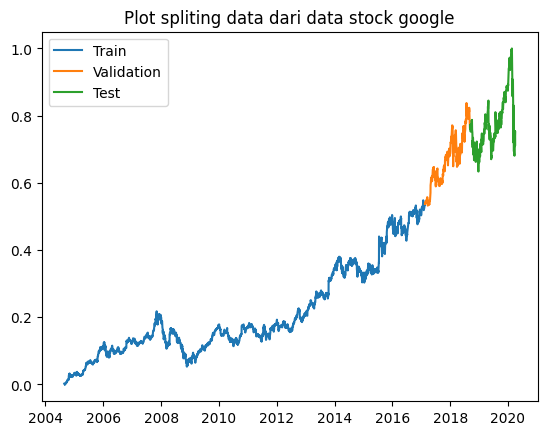

In [ ]:
q_80 = int(len(dates_google) * .8)
q_90 = int(len(dates_google) * .9)

dates_train_g, X_train_g, y_train_g = dates_google[:q_80], X_google[:q_80], y_google[:q_80]
dates_val_g, X_val_g, y_val_g = dates_google[q_80:q_90], X_google[q_80:q_90], y_google[q_80:q_90]
dates_test_g, X_test_g, y_test_g = dates_google[q_90:], X_google[q_90:], y_google[q_90:]

plt.title("Plot spliting data dari data stock google")
plt.plot(dates_train_g, y_train_g)
plt.plot(dates_val_g, y_val_g)
plt.plot(dates_test_g, y_test_g)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
#shape data split google
print(len(dates_train_g))
print(len(dates_val_g))
print(len(dates_test_g))

3141
393
393


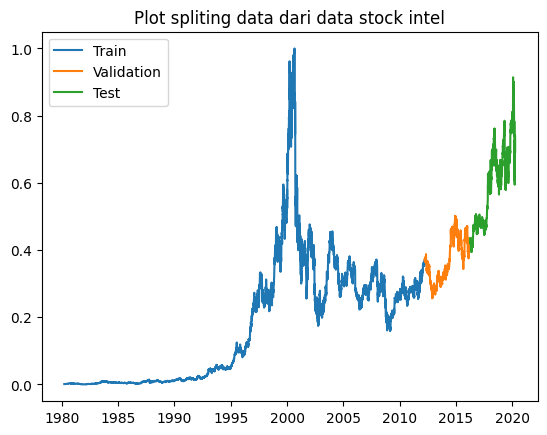

In [ ]:
q_80i = int(len(dates_intel) * .8)
q_90i = int(len(dates_intel) * .9)

dates_train_i, X_train_i, y_train_i = dates_intel[:q_80i-1], X_intel[:q_80i-1], y_intel[:q_80i-1]
dates_val_i, X_val_i, y_val_i = dates_intel[q_80i-1:q_90i], X_intel[q_80i-1:q_90i], y_intel[q_80i-1:q_90i]
dates_test_i, X_test_i, y_test_i = dates_intel[q_90i:], X_intel[q_90i:], y_intel[q_90i:]

plt.title("Plot spliting data dari data stock intel")
plt.plot(dates_train_i, y_train_i)
plt.plot(dates_val_i, y_val_i)
plt.plot(dates_test_i, y_test_i)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
#shape data split google
print(len(dates_train_i))
print(len(dates_val_i))
print(len(dates_test_i))

8073
1010
1010


Kode-kode di atas membagi data Google menjadi tiga set: set pelatihan, set validasi, dan set pengujian. Data dibagi dengan mengambil 80% data train, 10% data validation, dan 10% data test.

Kemudian, menampilkan grafik yang menunjukkan pembagian data dengan menampilkan nilai target untuk setiap set. Grafik menunjukkan perubahan nilai target dari waktu ke waktu untuk set pelatihan, set validasi, dan set pengujian.

Dan juga saya menampilkan panjang/len dari set train, test, valid untuk memastikan pembagian data nya sudah tepat.

Selain tuntutan soal, menggunakan rasio pembagian 80:10:10 seperti pada kode di atas adalah salah satu pilihan yang umum digunakan. Rasio ini memberikan jumlah data yang cukup untuk melatih model (80% dari data) sambil tetap menyisakan cukup data untuk mengevaluasi model selama pelatihan (10% dari data) dan mengevaluasi kinerja akhir model (10% dari data). Namun, rasio pembagian yang optimal dapat bervariasi tergantung pada jumlah data yang tersedia dan kompleksitas model yang digunakan.

# BaseModel (1b)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model_base = Sequential()
# tambahkan layer LSTM dengan units=50 dan activation function ReLU
model_base.add(LSTM(units=50, activation='relu', input_shape=(5, 1)))

# tambahkan layer akhir berupa node Perceptron dengan units=1
model_base.add(Dense(units=1))
print(model_base.summary())

model_base.compile(loss='mse',
              optimizer='sgd',
              metrics=['RootMeanSquaredError'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
None


pada arsitektur ini saya hanya mengikuti instruksi dari soal yaitu dengan LSTM (units=50) dan layer akhir berupa node Perceptron dengan units=1. Activation function untuk LSTM menggunakan ReLU

In [ ]:
model_base.fit(X_train_g, y_train_g, validation_data=(X_val_g, y_val_g), epochs=5)

Epoch 1/5
99/99 [==============================] - 3s 9ms/step - loss: 0.0236 - root_mean_squared_error: 0.1537 - val_loss: 0.1924 - val_root_mean_squared_error: 0.4386
Epoch 2/5
99/99 [==============================] - 1s 7ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 0.1655 - val_root_mean_squared_error: 0.4069
Epoch 3/5
99/99 [==============================] - 1s 7ms/step - loss: 0.0120 - root_mean_squared_error: 0.1097 - val_loss: 0.1534 - val_root_mean_squared_error: 0.3916
Epoch 4/5
99/99 [==============================] - 1s 6ms/step - loss: 0.0109 - root_mean_squared_error: 0.1043 - val_loss: 0.1415 - val_root_mean_squared_error: 0.3762
Epoch 5/5
99/99 [==============================] - 1s 6ms/step - loss: 0.0098 - root_mean_squared_error: 0.0988 - val_loss: 0.1306 - val_root_mean_squared_error: 0.3614


proses fitting dengan dataset saham google

In [ ]:
model_base.fit(X_train_i, y_train_i, validation_data=(X_val_i, y_val_i), epochs=5)

Epoch 1/5
253/253 [==============================] - 2s 7ms/step - loss: 0.0154 - root_mean_squared_error: 0.1240 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1223
Epoch 2/5
253/253 [==============================] - 2s 8ms/step - loss: 0.0109 - root_mean_squared_error: 0.1044 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1011
Epoch 3/5
253/253 [==============================] - 2s 6ms/step - loss: 0.0076 - root_mean_squared_error: 0.0873 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0833
Epoch 4/5
253/253 [==============================] - 1s 5ms/step - loss: 0.0052 - root_mean_squared_error: 0.0718 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0644
Epoch 5/5
253/253 [==============================] - 2s 6ms/step - loss: 0.0033 - root_mean_squared_error: 0.0578 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0528


proses fitting dengan dataset saham intel

In [ ]:
loss_gm, rmse_gm = model_base.evaluate(X_test_g, y_test_g)
loss_im, rmse_im = model_base.evaluate(X_test_i, y_test_i)

print()
print(f'Google stocks RMSE : {rmse_gm:.4f}')
print()
print(f'Intel stocks RMSE  : {rmse_im:.4f}')

32/32 [==============================] - 0s 3ms/step - loss: 0.0155 - root_mean_squared_error: 0.1243

Google stocks RMSE : 0.1930

Intel stocks RMSE  : 0.1243


Melakukan evaluasi pada test set dengan menggunakan metric rmse pada test set dari modelbase Google dan Intel. Berdasarkan output tersebut terlihat bahwa nilai rmse dari kedua model ini bisa dikatakan kurang baik karena nilai error yang cukup besar. Maka dari itu saya akan melakukan tunning pada model untuk membuat model baru dengan performa yang lebih baik.

In [ ]:
#test pred in google base
test_predictions_g = model_base.predict(X_test_g).flatten()
#test pred in intel
test_predictions_i = model_base.predict(X_test_i).flatten()

32/32 [==============================] - 0s 2ms/step


In [ ]:
len(test_predictions_g)

393

membuat prediksi pada test untuk data Google dan Intel

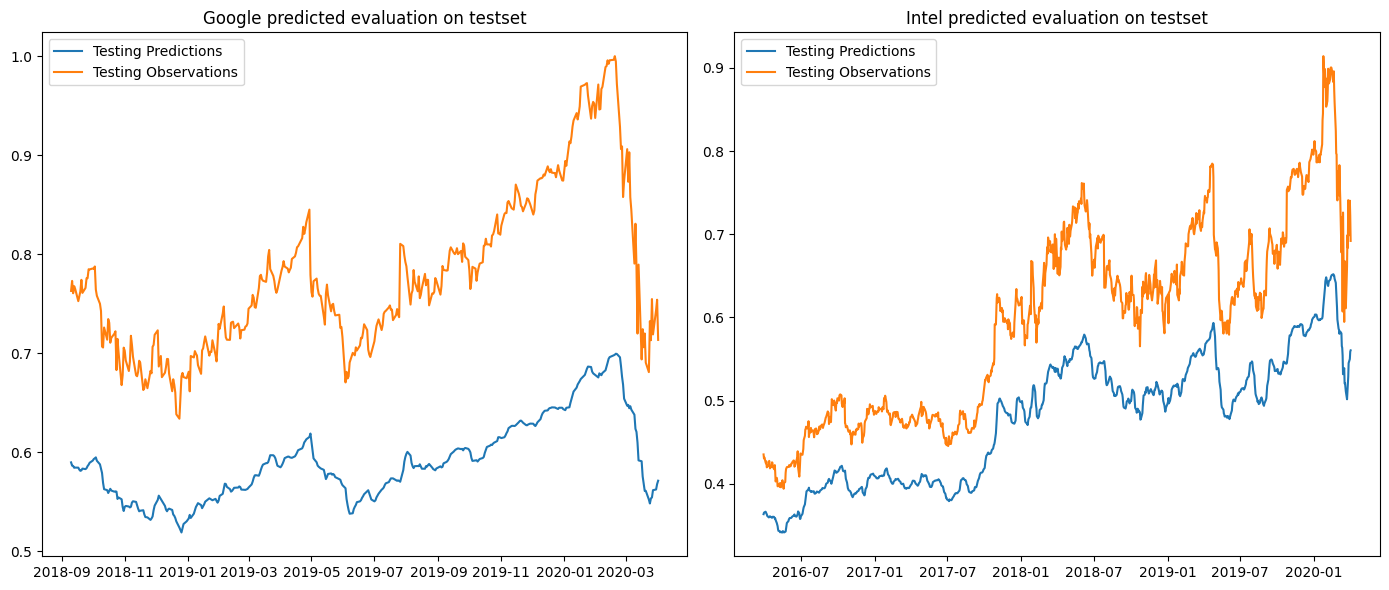

In [ ]:
#base model

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.set_title("Google predicted evaluation on testset")
ax1.plot(dates_test_g, test_predictions_g)
ax1.plot(dates_test_g, y_test_g)
ax1.legend(['Testing Predictions', 'Testing Observations'])

ax2.set_title("Intel predicted evaluation on testset")
ax2.plot(dates_test_i, test_predictions_i)
ax2.plot(dates_test_i, y_test_i)
ax2.legend(['Testing Predictions', 'Testing Observations'])

# Adjust the spacing between the subplots
plt.tight_layout()
plt.show()

Membuat dua subplot yang dimana subplot pertama menampilkan grafik prediksi dan observasi untuk data Google pada set test. Dan subplot kedua menampilkan grafik prediksi dan observasi untuk data Intel pada set pengujian

# Tunning model (1c)

List yang saya tunning dari aristektur sebelumnya:
- Menambahkan unit lstm menjadi 64
- Menambahkan regularisasi dropout
- Menambahkan hidden layer 10 unit
- Mengganti activation function jadi tanh
- Mengganti optimizer ke adam
- Mengganti learning rate
- Menambahkan epoch menjadi 15

**Alasan:**
- Menambahkan unit LSTM menjadi 64:

Dengan meningkatkan jumlah unit LSTM, memberikan model lebih banyak kapasitas untuk mempelajari pola yang kompleks dalam data saham. Dikarenakan saham memiliki sifat yang sangat dinamis dan rumit, dan dengan menggunakan lebih banyak unit LSTM, model dapat lebih baik menangkap pola jangka panjang dan hubungan non-linear antara fitur dan target.

- Menambahkan regularisasi Dropout:

Teknik yang efektif untuk mengurangi overfitting dalam NN. Dengan mengaktifkan dropout, sebagian node atau unit dalam jaringan LSTM akan dinonaktifkan secara acak pada setiap iterasi pelatihan. Hal ini membantu mencegah kelebihan ketergantungan pada fitur tertentu dan meningkatkan kemampuan generalisasi model terhadap data baru.

- Menambahkan hidden layer dengan 10 unit:

Dengan menambahkan hidden layer, memberikan model kemampuan untuk mempelajari representasi yang lebih kompleks.

- Mengganti activation function menjadi tanh:

Fungsi tanh memiliki rentang nilai yang simetris (-1 hingga 1), yang memungkinkan model untuk memodelkan hubungan yang kompleks antara input dan output. Namun perlu ditekankan bahwa hal ini tidak menyatakan bahwa tanh > relu pada semua kasus disini hanya saja pada saat saya melakukan tunning dengan tanh hasil yang dikeluarkan lebih baik. Maka dari itu, tuning hyperparameter dapat membantu menentukan fungsi aktivasi mana yang memberikan hasil terbaik untuk masalah tertentu.

- Mengganti optimizer menjadi Adam:

Optimizer Adam biasanya memberikan hasil yang lebih baik daripada optimizer lainnya dalam hal kecepatan konvergensi dan akurasi.

- Mengganti learning rate:

Learning rate yang terlalu tinggi dapat menyebabkan model tidak konvergen, sedangkan learning rate yang terlalu rendah dapat menyebabkan pelatihan berlangsung sangat lama. Dikarenakan saya mengganti optimizer dan by default learning ratenya juga ikut berubah (by default di keras sgd lr = 0.01 diganti menjadi adam lr = 0.001) dan juga menurut saya lr = 0.001 itu pas karea tidak terlalu tinggi dan juga tidak terlalu rendah.

- Menambahkan epoch menjadi 15:

Memberikan model lebih banyak kesempatan untuk mempelajari pola jangka panjang dalam data saham.

In [ ]:
from keras.layers import Dropout

model_tunning = Sequential()
model_tunning.add(LSTM(units=64, activation='tanh', input_shape=(5, 1)))
model_tunning.add(Dropout(0.2))
model_tunning.add(Dense(units=10, activation="tanh"))
model_tunning.add(Dense(units=1))
print(model_tunning.summary())

model_tunning.compile(loss='mse',
              optimizer='adam',
              metrics=['RootMeanSquaredError', 'MeanAbsoluteError', 'MeanAbsolutePercentageError'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 17,557
Trainable params: 17,557
Non-trainable params: 0
_________________________________________________________________
None


pada arsitektur ini saya menerapkan list tunning dan juga mengikuti instruksi dari soal untuk mencari nilai RMSE, MAE dan MAPE sehingga menambahkan metrics evaluasi

In [ ]:
model_tunning.fit(X_train_g, y_train_g, validation_data=(X_val_g, y_val_g), epochs=15)

Epoch 1/15
99/99 [==============================] - 5s 17ms/step - loss: 0.0073 - root_mean_squared_error: 0.0853 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 28488.6602 - val_loss: 7.9854e-04 - val_root_mean_squared_error: 0.0283 - val_mean_absolute_error: 0.0222 - val_mean_absolute_percentage_error: 3.2772
Epoch 2/15
99/99 [==============================] - 1s 8ms/step - loss: 4.0737e-04 - root_mean_squared_error: 0.0202 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 3868.6082 - val_loss: 5.4618e-04 - val_root_mean_squared_error: 0.0234 - val_mean_absolute_error: 0.0172 - val_mean_absolute_percentage_error: 2.5227
Epoch 3/15
99/99 [==============================] - 1s 7ms/step - loss: 3.4657e-04 - root_mean_squared_error: 0.0186 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 4058.3521 - val_loss: 6.5673e-04 - val_root_mean_squared_error: 0.0256 - val_mean_absolute_error: 0.0202 - val_mean_absolute_percentage_error: 2.9965
Epoch 4/1

proses fitting dengan dataset saham google

In [ ]:
model_tunning.fit(X_train_i, y_train_i, validation_data=(X_val_i, y_val_i), epochs=15)

Epoch 1/15
253/253 [==============================] - 2s 8ms/step - loss: 3.1228e-04 - root_mean_squared_error: 0.0177 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1507.2949 - val_loss: 4.4653e-04 - val_root_mean_squared_error: 0.0211 - val_mean_absolute_error: 0.0194 - val_mean_absolute_percentage_error: 5.2746
Epoch 2/15
253/253 [==============================] - 2s 7ms/step - loss: 3.0977e-04 - root_mean_squared_error: 0.0176 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 331.6536 - val_loss: 3.2807e-04 - val_root_mean_squared_error: 0.0181 - val_mean_absolute_error: 0.0164 - val_mean_absolute_percentage_error: 4.3734
Epoch 3/15
253/253 [==============================] - 3s 11ms/step - loss: 2.8372e-04 - root_mean_squared_error: 0.0168 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 1708.7876 - val_loss: 1.2912e-04 - val_root_mean_squared_error: 0.0114 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 2.6200
E

proses fitting dengan dataset saham intel

# Evaluasi (1d)

In [ ]:
loss_gi, rmse_g, mae_g, mape_g = model_tunning.evaluate(X_test_g, y_test_g)
loss_ii, rmse_i, mae_i, mape_i = model_tunning.evaluate(X_test_i, y_test_i)

# tampilkan nilai metric dengan dua angka desimal
print()
print("Google stocks prediction:")
print(f'RMSE : {rmse_g:.4f}')
print(f'MAE  : {mae_g:.4f}')
print(f'MAPE : {mape_g:.4f}')
print()
print("Intel stocks prediction:")
print(f'RMSE : {rmse_i:.4f}')
print(f'MAE  : {mae_i:.4f}')
print(f'MAPE : {mape_i:.4f}')


32/32 [==============================] - 0s 4ms/step - loss: 1.9798e-04 - root_mean_squared_error: 0.0141 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 1.4758

Google stocks prediction:
RMSE : 0.0171
MAE  : 0.0121
MAPE : 1.5849

Intel stocks prediction:
RMSE : 0.0141
MAE  : 0.0091
MAPE : 1.4758


RMSE dan MAE adalah dua metrik yang sering digunakan untuk mengukur seberapa baik model cocok dengan dataset. RMSE mengukur perbedaan antara nilai aktual dan nilai prediksi dengan cara menghitung akar kuadrat dari rata-rata kuadrat perbedaan antara nilai aktual dan nilai prediksi. Sedangkan MAE mengukur perbedaan antara nilai aktual dan nilai prediksi dengan cara menghitung rata-rata dari selisih absolut antara nilai aktual dan nilai prediksi. Semakin kecil RMSE atau MAE, semakin baik model cocok dengan dataset.
MAPE  adalah metrik yang digunakan untuk mengukur akurasi model dalam memprediksi data. MAPE mengukur persentase rata-rata kesalahan absolut antara nilai aktual dan nilai prediksi dibagi dengan nilai aktual. Semakin kecil MAPE, semakin baik model cocok dengan dataset.

- Dalam kasus stock prediction google, RMSE adalah 0.0171 dan MAE adalah 0.0121 karena kedua angka tersebut sangat kecil, dapat disimpulkan bahwa model yang digunakan cukup akurat dalam memprediksi harga saham Google. Sedangkan MAPE adalah 1.5849 atau sekitar 1.6%. Meskipun tidak ada standar baku untuk MAPE, biasanya semakin rendah nilainya, semakin baik model cocok dengan dataset.
- Dalam kasus stock prediction intel, RMSE adalah 0.0141 dan MAE adalah 0.0091 karena kedua angka tersebut sangat kecil, dapat disimpulkan bahwa model yang digunakan cukup akurat dalam memprediksi harga saham Intel. Sedangkan MAPE adalah 1.4758 atau sekitar 1.5%. Meskipun tidak ada standar baku untuk MAPE, biasanya semakin rendah nilainya, semakin baik model cocok dengan dataset.

**Kesimpulan sederhana dari proses tunning:**

Dengan membandingkan nilai rmse pada model_base atau dilakukan tunning, terbukti bahwa model yang dilakukan tuning adalah model yang lebih efisien/baik dikarenakan memiliki error yang lebih sedikit. Hal ini menandakan bahwa dengan melakukan tunning dengan benar dapat meningkatkan performa dari model.

In [ ]:
#test pred in google tunning
test_predictions_gt = model_tunning.predict(X_test_g).flatten()
#test pred in intel
test_predictions_it = model_tunning.predict(X_test_i).flatten()

32/32 [==============================] - 0s 3ms/step


membuat prediksi pada test untuk data Google dan Intel

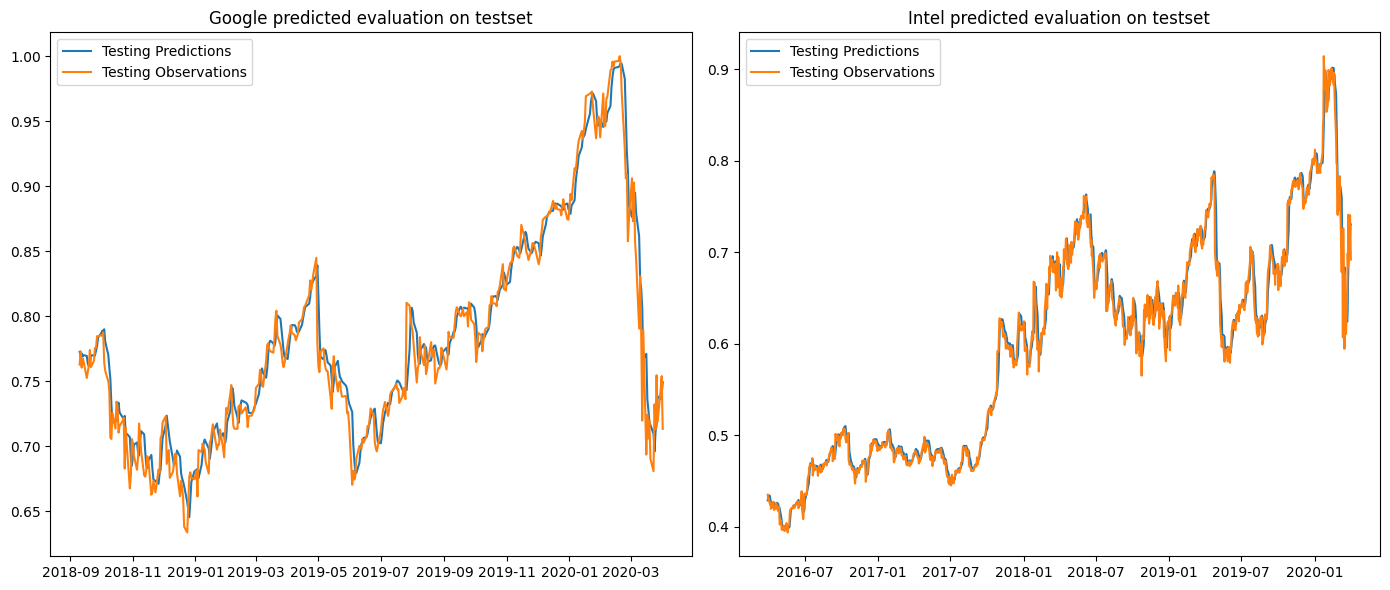

In [ ]:
#tunning model

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.set_title("Google predicted evaluation on testset")
ax1.plot(dates_test_g, test_predictions_gt)
ax1.plot(dates_test_g, y_test_g)
ax1.legend(['Testing Predictions', 'Testing Observations'])

ax2.set_title("Intel predicted evaluation on testset")
ax2.plot(dates_test_i, test_predictions_it)
ax2.plot(dates_test_i, y_test_i)
ax2.legend(['Testing Predictions', 'Testing Observations'])

# Adjust the spacing between the subplots
plt.tight_layout()
plt.show()

Membuat dua subplot yang dimana subplot pertama menampilkan grafik prediksi dan observasi untuk data Google pada set test. Dan subplot kedua menampilkan grafik prediksi dan observasi untuk data Intel pada set pengujian.


Terlihat bahwa hasil prediksi dan actual value yang mirip (saling menempel) hal ini membuktikan bahwa model sudah memiliki performa yang baik saat dilakukan evaluasi dengan test set.